# EVERYTHING IS CHAOS

In [1]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("/Users/rachelroca/Documents/Documents/GitHub/DAAAAMNdjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))
df.head()

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"


In [3]:
tweeters = df['user_username'].unique()
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']


In [4]:
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = len(df_temp)
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters

,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,influencers,...,belonging,learning,troll,CC impact,virtual participation,activation,futures,economic,beyond,celebration
mathyadriana,1,6,1,2,1,2,5,2,3,2,...,0,1,0,0,0,0,0,0,0,0
mathprofcarrie,7,69,3,11,14,2,25,11,47,33,...,4,6,0,2,1,1,1,1,0,0
pwr2dppl,8,51,7,8,12,6,20,12,39,28,...,5,1,0,2,0,1,0,0,0,0
xl772,2,6,1,1,2,1,6,0,3,4,...,0,0,0,0,0,0,0,0,0,0
WanderingPoint,1,11,3,1,4,2,6,1,8,5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superyarn,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dbdoughe,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cordesm,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f_futamura,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array=df_codes_array.astype('i')

In [6]:
#let's try normalizing because data be wild
#divide each row by the number of tweets/retweets
df_codes_array_norm_tweet = np.zeros((len(tweeters),len(codes)))
for i in range(len(tweeters)):
    df_codes_array_norm_tweet[i] = df_codes_array[i]/num_tweets_retweets[i]

## Mapper

### L1 norm

In [7]:
#getting the filter function
def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=30, overlap_frac=0.4)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})
g = pipe.fit_transform(df_codes_array)

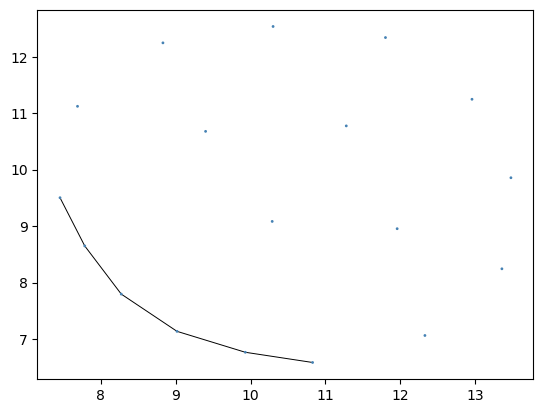

In [9]:
fig, ax = plt.subplots()
ig.plot(g,target=ax,palette=ig.RainbowPalette(),
    vertex_size=1,
    edge_width=0.7)
plt.show()

In [10]:
G = g.to_networkx()
fuck_this = nx.connected_components(G)
len(list(fuck_this))


13

In [11]:
#connected components igraph
fuck_me = ig.Graph.components(g)
print(fuck_me)

Clustering with 18 elements and 13 clusters
[ 0] 0, 3, 4, 6, 7, 8
[ 1] 1
[ 2] 2
[ 3] 5
[ 4] 9
[ 5] 10
[ 6] 11
[ 7] 12
[ 8] 13
[ 9] 14
[10] 15
[11] 16
[12] 17


In [12]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = l1_norm_trans

for i in nints:
    for j in olfrac:
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(i), overlap_frac=j)
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )

        fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
        #fig.show(config={'scrollZoom': True})
        #fig.write_image('figures/ints_'+str(i)+'_olfrac'+str(j)+'.png')
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
    

In [24]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = l1_norm_trans
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

([<matplotlib.axis.YTick at 0x7ff5c8734280>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

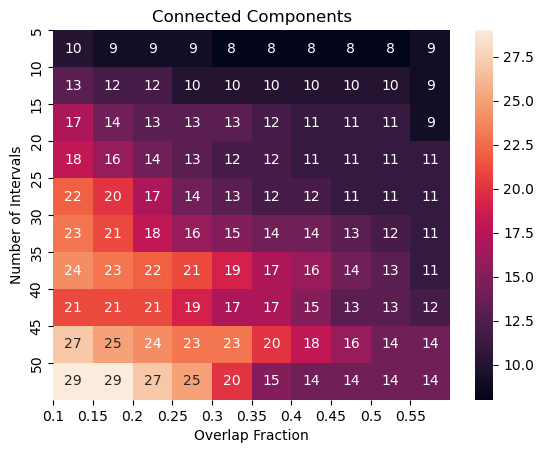

In [25]:
#make a heatmap of the connected components matrix
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c8b95a90>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

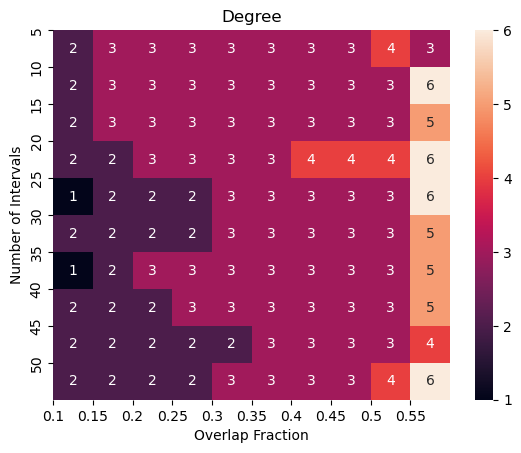

In [26]:
import seaborn as sns
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c8f4f2b0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

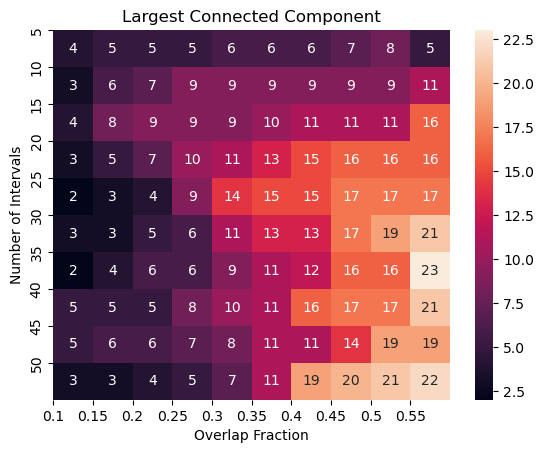

In [29]:
import seaborn as sns
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Eccentricity

In [39]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Eccentricity() #default is p = 2, metric = 'euclidean'
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
        fig.write_image('figures/eccentricity/ints_'+str(i)+'_olfrac'+str(j)+'.png')
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

In [54]:
cover = map.OneDimensionalCover(kind='uniform', n_intervals=30, overlap_frac=.35)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,    
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet, color_data=df_codes_array_norm_tweet)
fig.show(config={'scrollZoom': True})
graph = pipe.fit_transform(df_codes_array_norm_tweet)

#check out 1, 8, 11, 26


In [46]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[17, 11, 8, 5, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1]

([<matplotlib.axis.YTick at 0x7ff5ceb9cf40>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

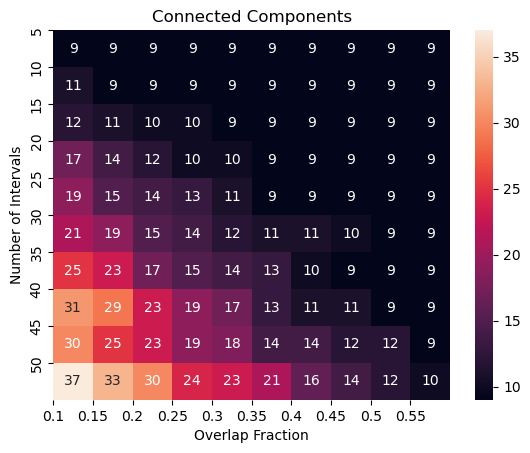

In [40]:
#make a heatmap of the connected components matrix
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5ca49b970>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

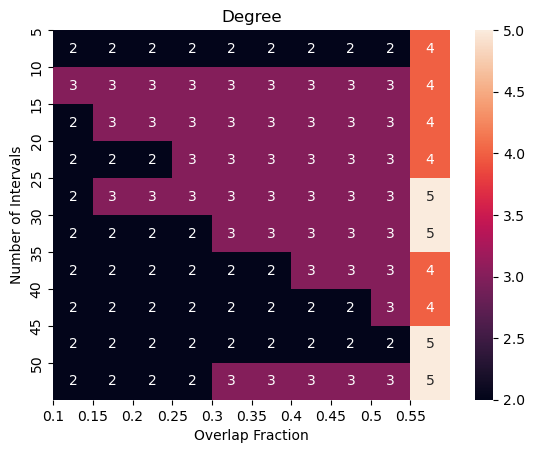

In [36]:
import seaborn as sns
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5ca730df0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

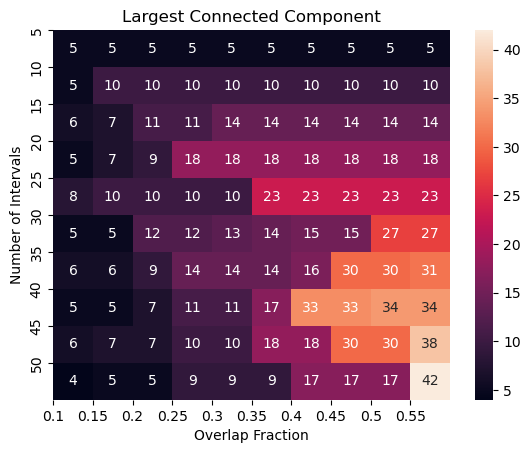

In [37]:
import seaborn as sns
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Projecting onto Amplification Code

In [30]:
#project onto amplification
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Projection(columns=[1])
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)

        
    

([<matplotlib.axis.YTick at 0x7ff5c9124d60>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

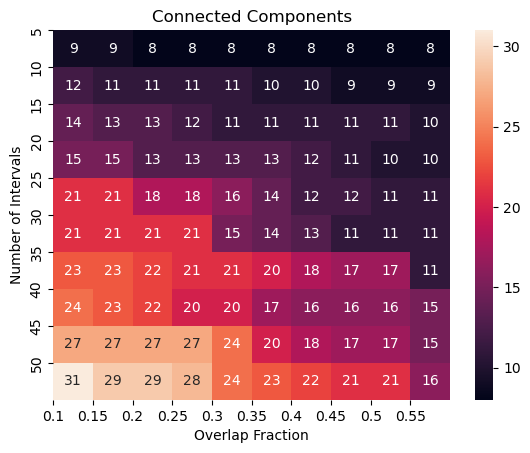

In [31]:
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.title("Connected Components")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c8a530d0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

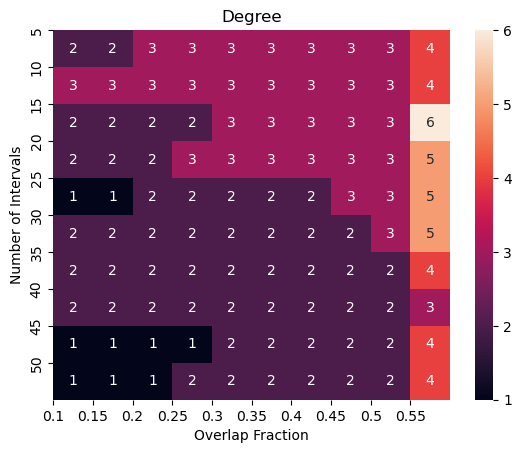

In [32]:

sns.heatmap(degree_matrix, annot=True)
#add labels
plt.title("Degree")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7ff5c9535bb0>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

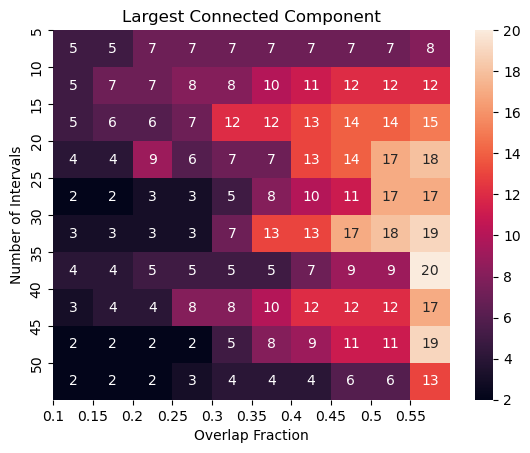

In [33]:
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.title("Largest Connected Component")
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)

### Projecting onto a set of codes (Self Organization Theme)
*warning: this is a work in progress and is a bit cranky*

In [21]:
#project on SO (1,16,24,27,30)
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = map.Projection(columns=[1,16,24,27,30])
connected_components_matrix = np.zeros((len(nints), len(olfrac)))
degree_matrix = np.zeros((len(nints), len(olfrac)))
max_cc_matrix = np.zeros((len(nints), len(olfrac)))

for i in range(len(nints)):
    for j in range(len(olfrac)):
        cover = map.CubicalCover(kind='uniform', n_intervals=int(nints[i]), overlap_frac=olfrac[j])
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
        G = graph.to_networkx()
        cc = nx.connected_components(G)
        connected_components_matrix[i,j] = len(list(cc))
        degrees = [val for (node, val) in G.degree()]
        degree_matrix[i,j] = np.max(degrees)
        largest_cc = max(nx.connected_components(G), key=len)
        max_cc_matrix[i,j] = len(largest_cc)


KeyboardInterrupt: 

([<matplotlib.axis.YTick at 0x7fa276cd9f70>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

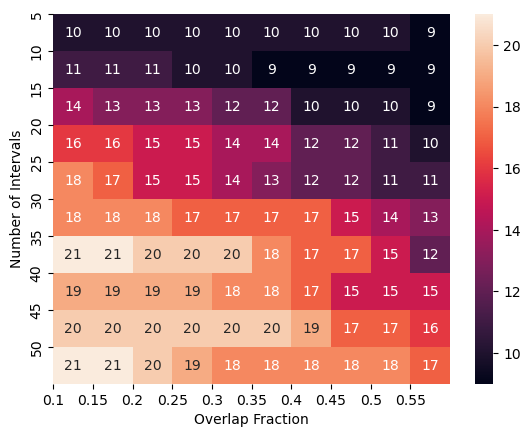

In [ ]:
import seaborn as sns
sns.heatmap(connected_components_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa2774a1e20>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

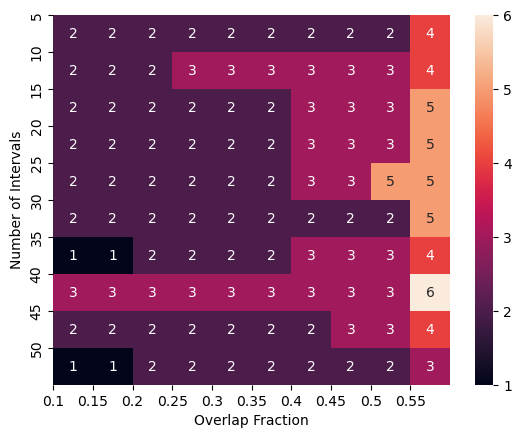

In [ ]:
sns.heatmap(degree_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)


([<matplotlib.axis.YTick at 0x7fa271e5be20>,
 [Text(0, 0, '5'),
  Text(0, 1, '10'),
  Text(0, 2, '15'),
  Text(0, 3, '20'),
  Text(0, 4, '25'),
  Text(0, 5, '30'),
  Text(0, 6, '35'),
  Text(0, 7, '40'),
  Text(0, 8, '45'),
  Text(0, 9, '50')])

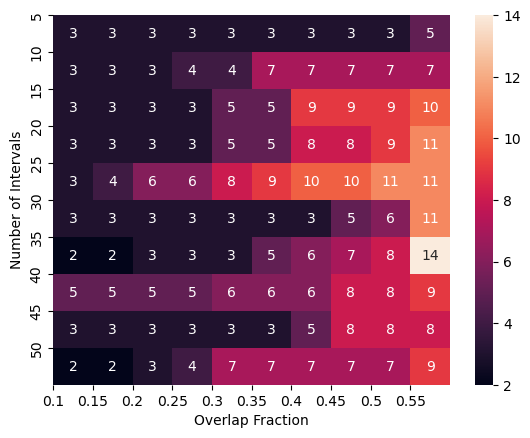

In [ ]:
sns.heatmap(max_cc_matrix, annot=True)
#add labels
plt.xlabel("Overlap Fraction")
plt.ylabel("Number of Intervals")
plt.xticks(np.arange(len(olfrac)), np.round(olfrac,2))
plt.yticks(np.arange(len(nints)), nints)